# Bengaluru House Price Prediction

What are the things that a potential home buyer considers before purchasing a house?
The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals and the most important factor — the price

# About the Data

The Dataset Contains the following factors :
    1.Area Type ( plot area / Built-up area / Super Built-up area)
    2.Availability
    3.Location 
    4.Size ( Number of bedrooms per House eg.-in BHK )
    5.Society
    6.Total sqft ( Total Surface Area of the House )
    7.Balcony ( No. of Balconies ) 
    8.Price 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

## Importing the dataset

In [2]:
dataset_1 = pd.read_csv('Bengaluru_House_Data.csv')
dataset_1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
dataset_1.shape

(13320, 9)

# Removing The Unnecessary Data columns

In [4]:
dataset_2 = dataset_1.drop(['availability','area_type','society','balcony'] , axis='columns')
dataset_2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning

# Handling The Missing Data

In [5]:
dataset_2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
#Deleting all the rows with any missing Data
dataset_3 = dataset_2.dropna() 
dataset_3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
dataset_3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
dataset_3.shape

(13246, 5)

# Creating new column to improve data (Column - size)

In [9]:
dataset_3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
pd.set_option('mode.chained_assignment', None) # To stop the warning of copying the dataset.
dataset_3['bhk'] = dataset_3['size'].apply(lambda x:int(x.split(' ')[0]))

In [11]:
dataset_3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
# Droping the 'size' Column as it is not needed.
dataset_4 = dataset_3.drop(['size'] , axis='columns') 

In [13]:
dataset_4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [14]:
dataset_4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

The total_sqft dataColumn have a data '1133 - 1384' which is a Range.
In order to prevent Such error we will take Average of extreme values.

In [15]:
# Function to Check if the data is float or not.
def is_float(n):
    try:
        n = float(n)
    except:
        return False
    return True

In [16]:
dataset_4[~dataset_4['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [17]:
# Function to convert The range to Average of its extreme values.
def convert_range_to_avg(n):
    lst = n.split('-')
    if len(lst) == 2:
        return (float(lst[0]) + float(lst[1]))/2
    try:
        return float(n)
    except:
        
        return None

In [18]:
dataset_5 = dataset_4.copy()
dataset_5['total_sqft'] = dataset_5['total_sqft'].apply(convert_range_to_avg)

In [19]:
dataset_5.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [20]:
dataset_5.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [21]:
# Deleting all the rows with missing data in total_sqft
dataset_5.dropna() 
dataset_5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


# Creating a new feature 

To make the Outlier Cleaning More Convinient We create a new Column(Feature).
price_per_sqft is Highly used in Real Estate.

In [22]:
dataset_5['price_per_sqft'] = dataset_5['price']*100000/dataset_5['total_sqft']
dataset_5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [23]:
len(dataset_5.location.unique())

1304

In [24]:
dataset_5.location =  dataset_5.location.apply(lambda x : x.strip())
location_data = dataset_5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_data.head()

location
Whitefield         535
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     266
Thanisandra        236
Name: location, dtype: int64

In [25]:
location_less_than_10 = location_data[location_data<=10]
location_less_than_10.head()

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
Name: location, dtype: int64

In [26]:
dataset_5.location = dataset_5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(dataset_5.location.unique())

242

# Outlier Removal

In Bengaluru the sqft area per 1bhk is approximately more than 450 sqft.
We will be removing all the data that has less than 450sqft area per sqft.

In [27]:
dataset_6 = dataset_5[~(dataset_5.total_sqft / dataset_5.bhk <450)]
dataset_6.shape

(10673, 6)

In [28]:
dataset_6.price_per_sqft.describe()

count    10627.000000
mean      6193.216738
std       3656.289661
min        267.829813
25%       4261.582324
50%       5331.882481
75%       6859.071438
max      76923.076923
Name: price_per_sqft, dtype: float64

In [29]:
# Function to remove datapoints beyond Standard Deviation in price per sqft
# m --> mean , sd --> standard deviation

def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - sd)) & (subdf.price_per_sqft <= (m + sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out


In [30]:
dataset_7 = remove_outliers(dataset_6)
dataset_7.shape

(8537, 6)

In [31]:
# Function used to plot 2bhk and 3bhk vs price

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (8,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Area (Sq.feet)")
    plt.ylabel("Price (Lakh)")
    plt.title(location)
    plt.legend()
    


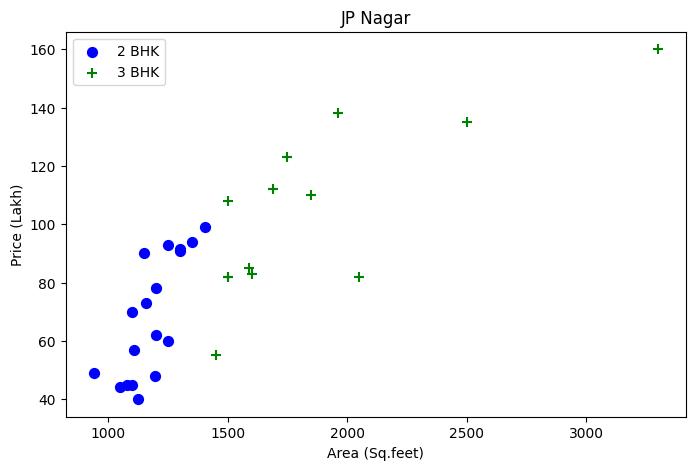

In [32]:
plot_scatter_chart(dataset_7,"JP Nagar")

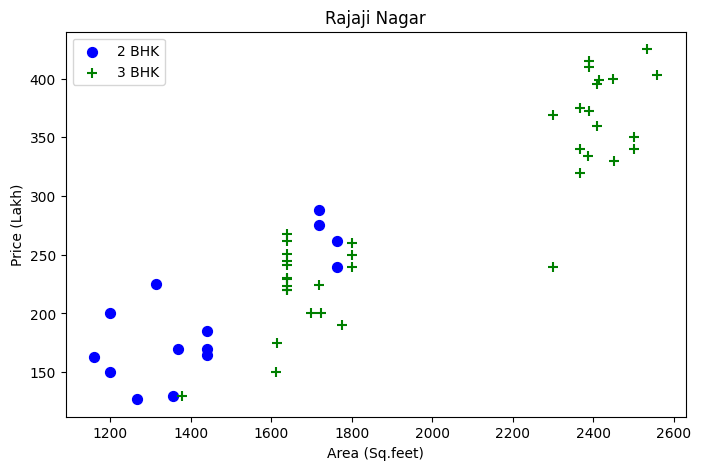

In [33]:
plot_scatter_chart(dataset_7,"Rajaji Nagar")

In [34]:
# Function used to filter he data where any house having less bhk  value than other should have less price comparatively.

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [35]:
dataset_8 = remove_bhk_outliers(dataset_7)
dataset_8.shape

(6268, 6)

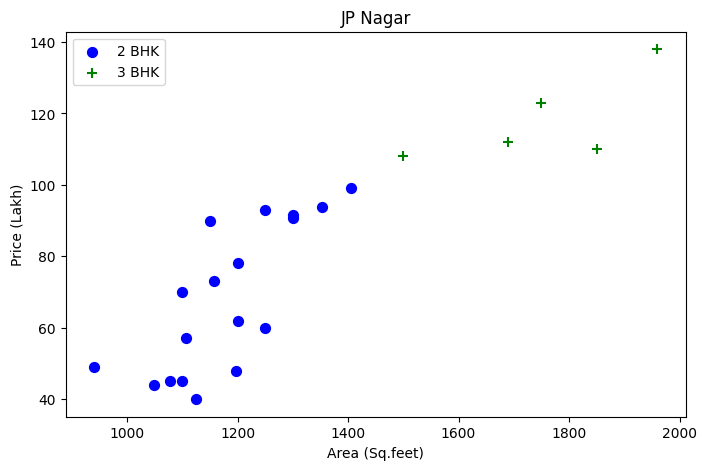

In [36]:
plot_scatter_chart(dataset_8,"JP Nagar")

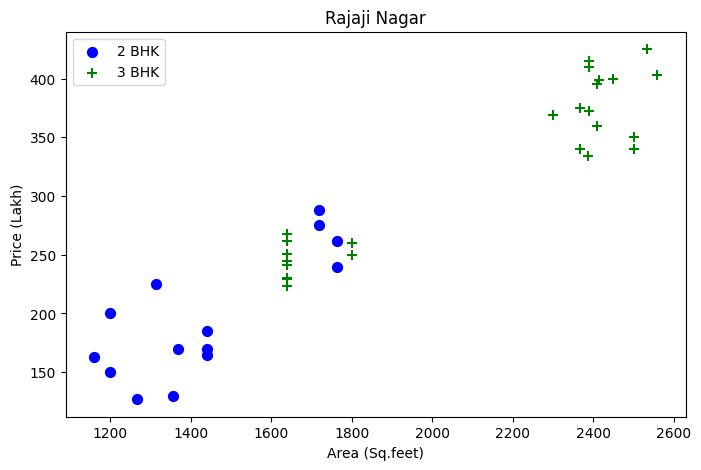

In [37]:
plot_scatter_chart(dataset_8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

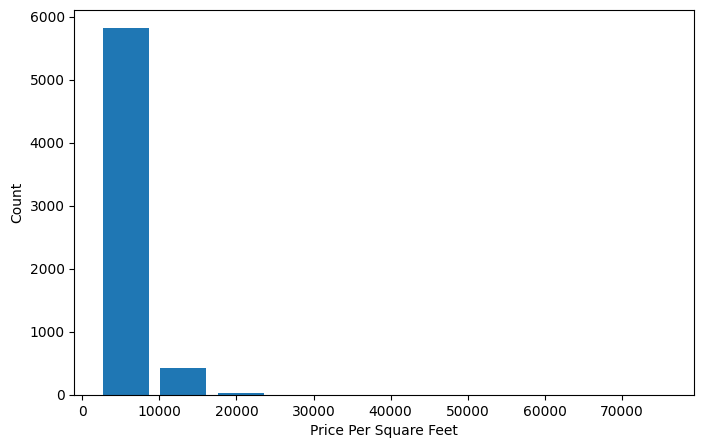

In [38]:
#Histogram
plt.hist(dataset_8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

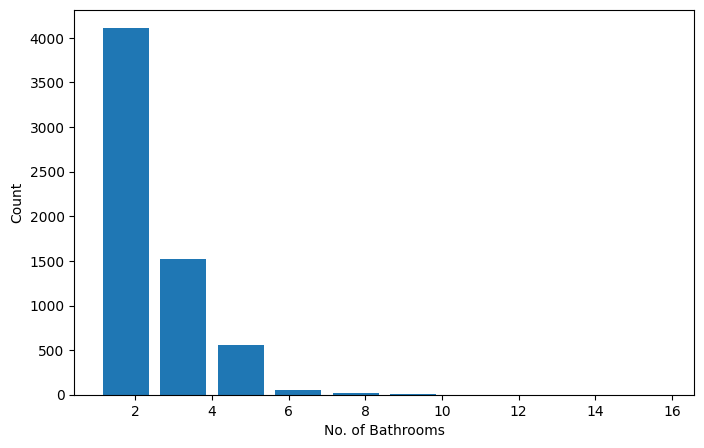

In [39]:
# Histogram
plt.hist(dataset_8.bath,rwidth=0.8)
plt.xlabel("No. of Bathrooms")
plt.ylabel("Count")

In [40]:
# Removing all the houses with bathrooms more than bhk + 2 (Because it is unusual)
dataset_9 = dataset_8[dataset_8.bath < dataset_8.bhk+2]
dataset_8.shape

(6268, 6)

In [41]:
dataset_9.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
4,1st Block Jayanagar,2750.0,4.0,413.0,4,15018.181818


We have Removed all the outliers so no need of the Feature price per sqft.

In [42]:
dataset_10 = dataset_9.drop(['price_per_sqft'] , axis='columns')

In [43]:
dataset_10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1235.0,2.0,148.0,2
4,1st Block Jayanagar,2750.0,4.0,413.0,4


# Encoding 

In [44]:
dummies = pd.get_dummies(dataset_10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
dataset_11 = pd.concat([dataset_10,dummies.drop('other',axis = 'columns')], axis= 'columns')
dataset_11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Since We encoded the location Column we no longer need it.
dataset_12 = dataset_11.drop('location',axis = 'columns')
dataset_12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
dataset_12.shape

(6197, 242)

# Setting The Data

In [48]:
# Set X all the Columns except for the price Column
X = dataset_12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2750.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Set y to price Column
y = dataset_12.price
y.head()

0    428.0
1    194.0
2    235.0
3    148.0
4    413.0
Name: price, dtype: float64

In [50]:
# X = X.values
# y = y.values

## Splitting the dataset into the Training set and Test set

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.2, random_state=10)

## Training the Random Forest Regression model on the whole dataset

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.8905013818784963

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86654613, 0.87952756, 0.86260533, 0.88876252, 0.88014234])

In [54]:
#Function to predict prices using data as input
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return regressor.predict([x])[0]

# Sample Predictions

In [55]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

93.32476354789183

In [56]:
predict_price('1st Phase JP Nagar',2825, 4, 4)#1st Phase JP Nagar,4 BHK,Prhtsok,2825,4,3,250

242.91735476810982

In [57]:
predict_price('Indira Nagar',1000, 2, 2)


146.41318628613533

In [58]:
predict_price('Indira Nagar',1000, 3, 3)

145.76934775644605

In [59]:
predict_price('Indira Nagar',2200,4,4)

244.33445275306684

In [60]:
predict_price('7th Phase JP Nagar',3600, 4, 4)#7th Phase JP Nagar,4 BHK,,3600,4,3,400

278.0159803027603

In [61]:
predict_price('Hebbal',3300, 4, 4)

258.3933733042816

Hence , We have Successfully implemented a model to predict House Prices in Bengaluru.
In this Model we have have used Linear Regression , scikit learn , pandas , numpy , matplot library, etc.

Dataset Resource : https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

Project is made with reference to codebasics (https://www.youtube.com/@codebasics)  